In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from theano.printing import pydotprint
import pickle

## Linear Regression - Housing Data Set

In [ ]:
from theano import pp
from theano import function
import theano.tensor as T

In [101]:
# Trainings und Testdaten
with open('data/housing.dframe', 'rb') as dframe:
    housing = pickle.load(dframe)
x_train = np.stack([np.ones((len(housing['TAX']))), housing['RM']],axis=1)
y_train = np.array(housing['MEDV'])
# plt.scatter(x_train[:,1], y_train ,marker='x')
# housing.head()

In [102]:
# model setup 
x = T.dmatrix('x')
y = T.dvector('y')
theta = T.dvector('theta')
h = T.dot(x,theta)
J =  T.sum(T.pow(h - y,2)) / (2 * x.shape[0]) + T.sum(T.pow(theta,2))
gJ = T.grad(J, theta)

# print(pp(gJ))
cost = function([x, y, theta], J)
grad = function([x, y, theta], gJ)
H = function([x,theta], h)

f = function([x,theta], h)
# cost(x_train, y_train, [0,0])

In [103]:
theta = [0, 0]
rate = 0.01
n_epoch = 100
hist = np.zeros(n_epoch)
for i in range(n_epoch):
    theta = theta - rate * grad(x_train, y_train, theta)
    hist[i] = cost(x_train,y_train, theta)

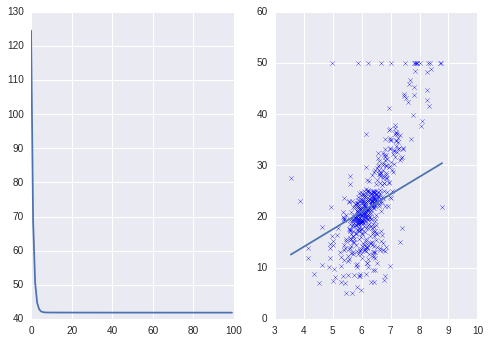

In [105]:
line = np.linspace(x_train[:,1].min(),x_train[:,1].max())
y = f( np.stack([np.ones(len(line)),line],axis=1),theta)
plt.subplot(121)
plt.plot(hist)
plt.subplot(122)
plt.plot(line,y)
plt.scatter(x_train[:,1], y_train,marker='x')

## Binary Classification - Pima Indians Diabetes Data Set

In [106]:
with open('data/pima-indians-diabetes.tuple', 'rb') as xtuple:
    x_train, y_train, x_test, y_test = pickle.load(xtuple)
y_train = np.atleast_2d(y_train).transpose()

In [108]:
# model setup 
x = T.dmatrix('x')
y = T.dmatrix('y')
w1 = T.dmatrix('w1')
h =  T.dot(x, w1)
#TODO: Normalisierung
J =  - T.sum(T.mul(y, T.log(h)) + T.mul((1 - y),T.log(1 - h)))
gJ = T.grad(J, w1)

cost = function([x, y, w1], J)
grad = function([x, y, w1], gJ)
H = function([x,w1], h)
f = function([x,w1], h)


In [43]:
np.sum(np.multiply(np.log(H(x_train, np.ones((8,1)))),y_train))

1122.9199197096796

In [46]:
cost(x_train,y_train, np.ones((8,1)))

array(nan)

In [45]:
theta - rate * grad(x_train, y_train, np.ones((8,1)))

Elemwise{sub,no_inplace}.0

In [109]:
theta = np.ones((8,1))
rate = 0.01
n_epoch = 100
hist = np.zeros(n_epoch)
for i in range(n_epoch):
    hist[i] = cost(x_train, y_train, theta)
    theta -= rate * grad(x_train, y_train, theta)

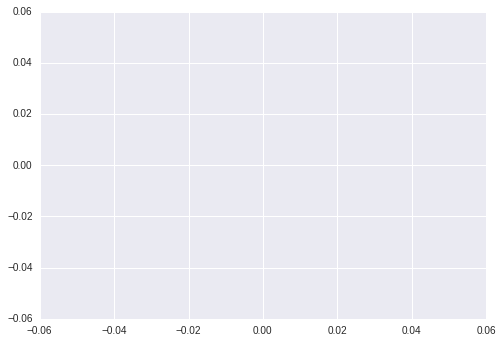

In [110]:
#     print(theta)
plt.plot(hist)

In [47]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

In [96]:
# net_input = Input(input_dim=8)
model = Sequential()
model.add(Dense(32, batch_input_shape=(None, 8)))
model.add(Dense(8, activation='tanh', name='p1'))
model.add(Dense(3, activation='tanh', name='p2'))
model.add(Dense(1, activation='tanh')) 
# model = Model(input=net_input, output=out)
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [97]:
history = model.fit(x_train, y_train,
                verbose=0,
                nb_epoch=2000,
                batch_size=256,
                validation_data=(x_test, y_test))

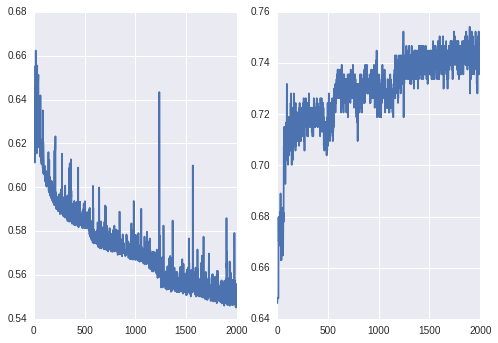

In [100]:
plt.subplot(121)
plt.plot(history.history['loss'])
plt.subplot(122)
plt.plot(history.history['acc'])

## Image Classification - CIFAR-10 dataset